In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

##### Step 1: Load the given data 

In [45]:
train_df=pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\DataSets\titanic\train.csv')
test_df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\DataSets\titanic\test.csv")

In [46]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Step 2: Inspect the Data for Missing Values and Data Types

In [47]:
print(train_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [48]:
print(train_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [49]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [50]:
# Statistical Analysis on train_df

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Step 3: Clean the Data
Handle missing values and correct data types.

In [51]:
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [52]:
# Fill missing values with median age

train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

In [53]:
# Chicking missing values on train and test data sets

print(train_df.isnull().sum())
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [54]:
train_df_len = len(train_df)

# Concatinating train and test datasets 
train_df = pd.concat([train_df,test_df], axis = 0).reset_index(drop = False)

In [55]:
train_df[train_df["Embarked"].isnull()]

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


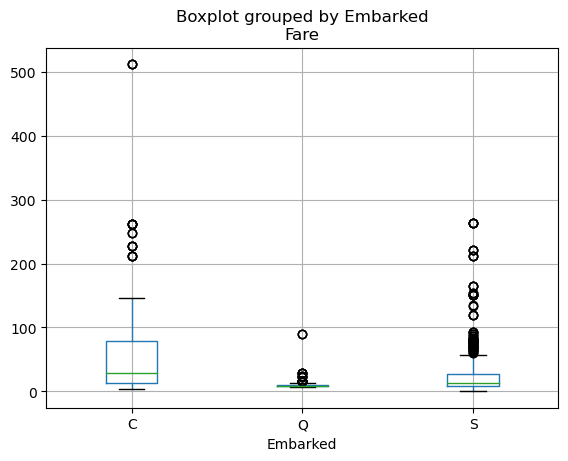

In [56]:
train_df.boxplot(column="Fare",by = "Embarked")
plt.show()

In [57]:
# droping column=Embarked and checking null values
train_df = train_df.dropna(subset=['Embarked'])
train_df.isnull().sum()

index             0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age              86
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
dtype: int64

In [58]:
train_df[train_df["Fare"].isnull()]

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [59]:
# Filling the misssing values by mean or median of the fare
train_df['Fare'].fillna(train_df['Fare'].median(),inplace = True)
test_df['Fare'].fillna(test_df['Fare'].median(),inplace = True)
train_df.isnull().sum()

index             0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age              86
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [60]:
cabin_mapping = {char: index for index, char in enumerate("ABCDEFGHIJKLMNOPQRSTUVWXYZ", start=1)}
train_df['Cabin'] = train_df['Cabin'].map(lambda x: cabin_mapping.get(str(x)[0], 0) if pd.notna(x) else 0)

In [61]:
# Missing value handling and other preprocessing steps
train_df = train_df.dropna(subset=['Survived'])
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df.fillna('0', inplace=True)
print(train_df.isnull().sum())

index          0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


#### Step 4: Detect and Handle Outliers
Define a function to detect outliers using the Interquartile Range (IQR) method.

In [62]:
# Finding the outliers 

def detect_outliers(df, features):
    outlier_indices = []
    
    for feature in features:
        Q1 = np.percentile(df[feature].dropna(), 25)   # 1st quartile (25%)
        Q3 = np.percentile(df[feature].dropna(), 75)   # 3rd quartile (75%)
        IQR = Q3 - Q1                                  # Interquartile range (IQR)
        # outlier step
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

from collections import Counter

outliers = detect_outliers(train_df, ["Age", "SibSp", "Parch", "Fare"])
 
print(outliers)

[7, 16, 119, 164, 268, 297, 305, 386, 438, 587, 642, 659, 745, 824, 879, 27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [63]:
# Display the outliers
train_df.loc[outliers]

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,0,S
16,16,17,0.0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,0,Q
119,119,120,0.0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,0,S
164,164,165,0.0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,0,S
268,268,269,1.0,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,3,S
297,297,298,0.0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,3,S
305,305,306,1.0,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,3,S
386,386,387,0.0,3,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,0,S
438,438,439,0.0,1,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.0000,3,S
587,587,588,1.0,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.00,1,1,13567,79.2000,2,C


In [64]:
# Drop outliers
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)
train_df

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,3,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,3,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
860,887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,2,S
861,888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,0,S
862,889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,3,C


##### Step 5: Perform Exploratory Data Analysis (EDA)
Analyze the relationships between variables.
Visualize the Data to Identify Patterns and Trends.

This graph shows number of survived and not survived for comparison


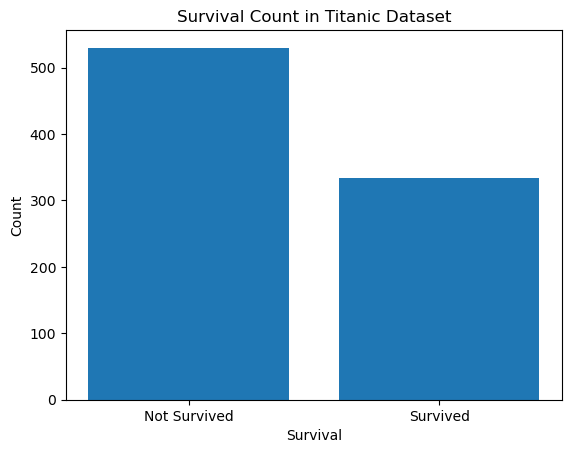

Number of who did not survive: 530
Number of survived: 334


In [65]:
print("This graph shows number of survived and not survived for comparison")

survived_count = train_df['Survived'].value_counts()

# Defining Categories
categories = ['Not Survived', 'Survived']
values = [survived_count[0], survived_count[1]]

# Creating Bar plot
plt.bar(categories, values)

plt.xlabel('Survival')
plt.ylabel('Count')
plt.title('Survival Count in Titanic Dataset')
plt.show()

print(f"Number of who did not survive: {survived_count[0]}")
print(f"Number of survived: {survived_count[1]}")

This graph shows how many of which class there are.


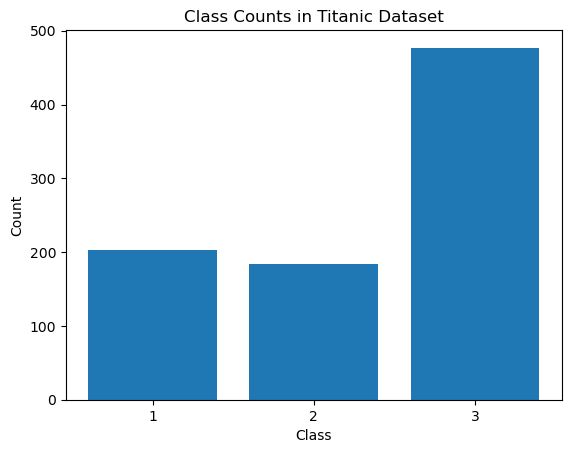

Number of first Class: 203
Number of second Class: 184
Number of third Class: 477


In [66]:
print("This graph shows how many of which class there are.")

pclass_count = train_df["Pclass"].value_counts()

categories = ["1", "2", "3"]

values = [pclass_count[1], pclass_count[2], pclass_count[3]]

plt.bar(categories, values)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Counts in Titanic Dataset')
plt.show()

print(f"Number of first Class: {values[0]}")
print(f"Number of second Class: {values[1]}")
print(f"Number of third Class: {values[2]}")

This graph shows how many of person survived and not survived by class.


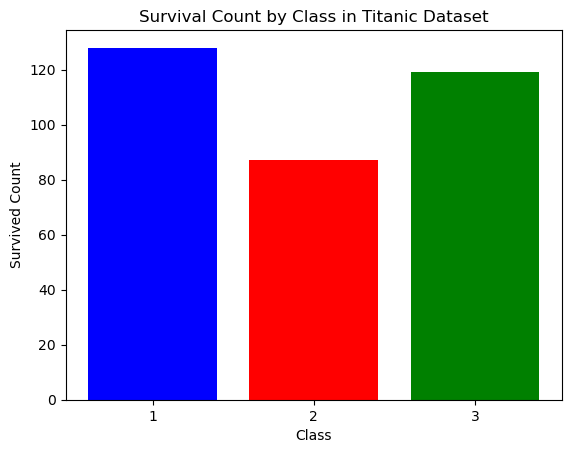

Number of Survived in first Class: 128
Number of Survived in second Class: 87
Number of Survived in third Class: 119


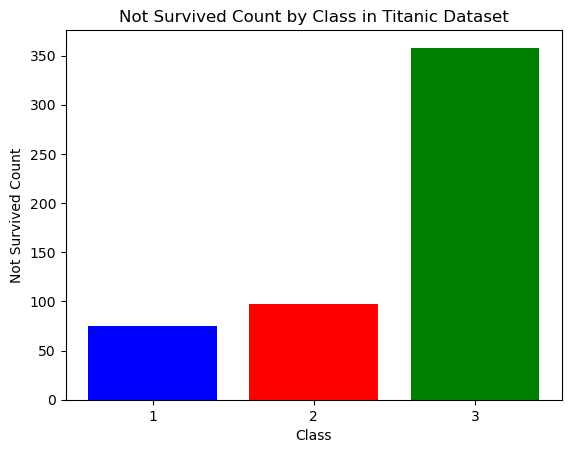

Number of Not Survived in first Class: 75
Number of Not Survived in second Class: 97
Number of Not Survived in third Class: 358


In [67]:
print("This graph shows how many of person survived and not survived by class.")

survived_count = train_df[train_df['Survived'] == 1]['Pclass'].value_counts()

not_survived_count = train_df[train_df['Survived'] == 0]['Pclass'].value_counts()

categories = ['1', '2', '3']

#Shows count of survivors for each passenger class, assigning a default value of 0 if there are no survivors in that class.
values = [survived_count[1], survived_count[2], survived_count[3]]

not_survived_values = [not_survived_count[1], not_survived_count[2], not_survived_count[3]]

plt.bar(categories, values, color=['blue', 'red', 'green'])

plt.xlabel('Class')
plt.ylabel('Survived Count')
plt.title('Survival Count by Class in Titanic Dataset')
plt.show()

print(f"Number of Survived in first Class: {values[0]}")
print(f"Number of Survived in second Class: {values[1]}")
print(f"Number of Survived in third Class: {values[2]}")

plt.bar(categories, not_survived_values, color=['blue', 'red', 'green'])

plt.xlabel('Class')
plt.ylabel('Not Survived Count')
plt.title('Not Survived Count by Class in Titanic Dataset')
plt.show()

print(f"Number of Not Survived in first Class: {not_survived_values[0]}")
print(f"Number of Not Survived in second Class: {not_survived_values[1]}")
print(f"Number of Not Survived in third Class: {not_survived_values[2]}")

This graph shows sex distribution


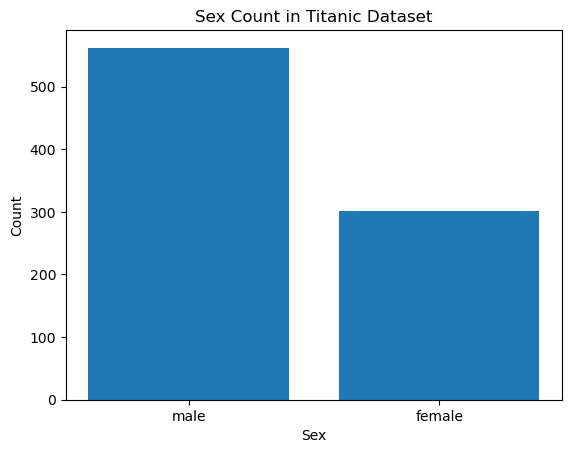

Number of Male: 562
Number of Female: 302


In [68]:
print("This graph shows sex distribution")

sex_count = train_df['Sex'].value_counts()

plt.bar(sex_count.index, sex_count.values)

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex Count in Titanic Dataset')


plt.show()

print(f"Number of Male: {sex_count['male']}")
print(f"Number of Female: {sex_count['female']}")


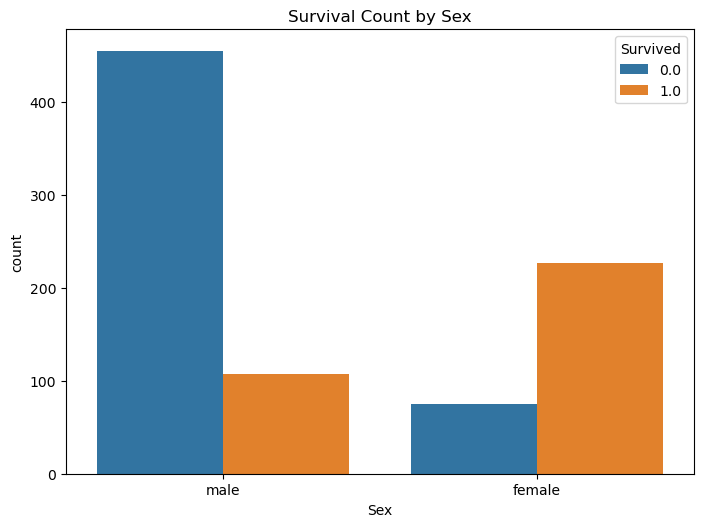

In [69]:
plt.figure(figsize=(20, 15))


# 1. Sex by Survived
plt.subplot(3, 3, 1)
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival Count by Sex')

plt.tight_layout()
plt.show()

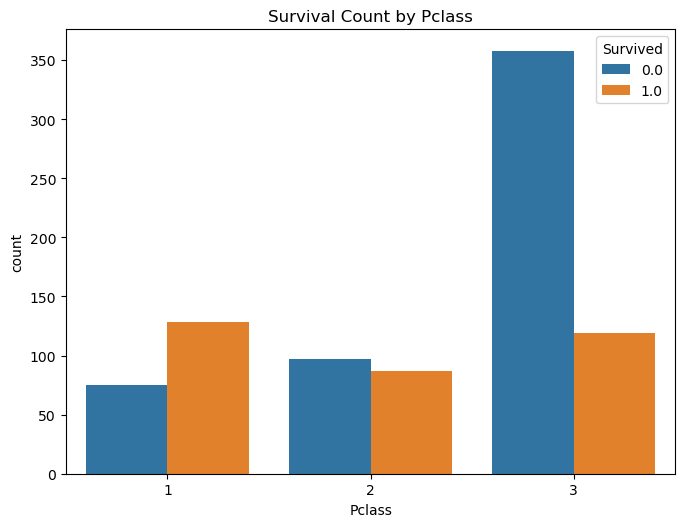

In [70]:
plt.figure(figsize=(20, 15))

# 2. Pclass by Survived
plt.subplot(3, 3, 2)
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival Count by Pclass')

plt.tight_layout()
plt.show()

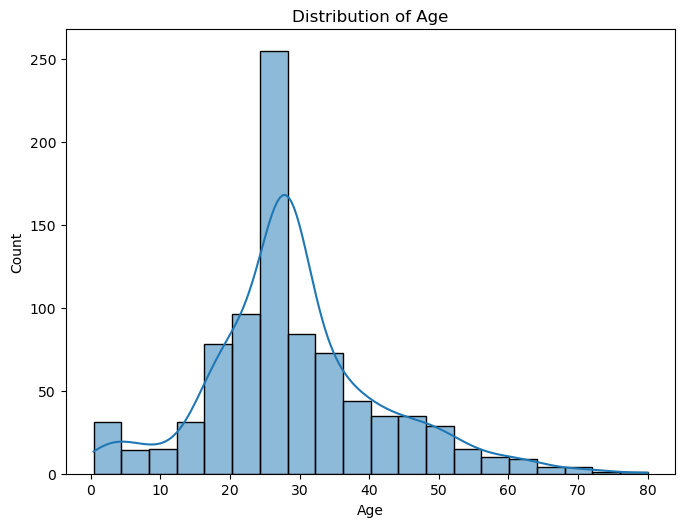

In [71]:
plt.figure(figsize=(20, 15))

# 3. Age Distribution
plt.subplot(3, 3, 3)
sns.histplot(train_df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')

plt.tight_layout()
plt.show()

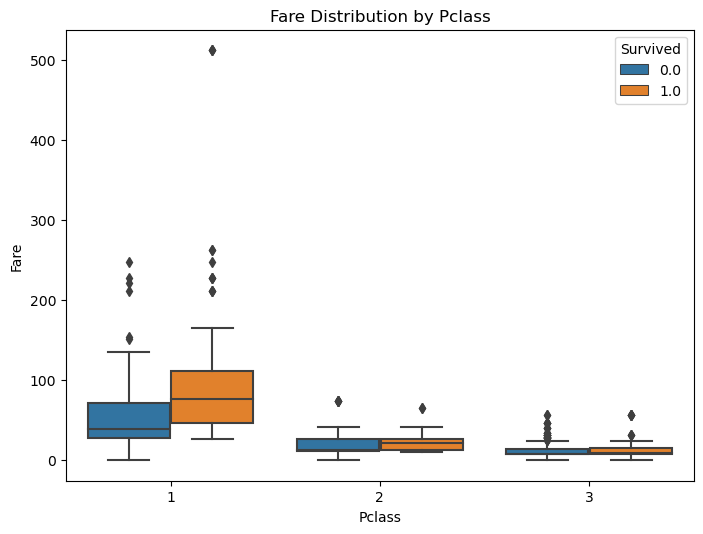

In [72]:
plt.figure(figsize=(20, 15))

# 4. Pclass by Fare
plt.subplot(3, 3, 4)
sns.boxplot(x='Pclass', y='Fare', data=train_df, hue='Survived')
plt.title('Fare Distribution by Pclass')

plt.tight_layout()
plt.show()

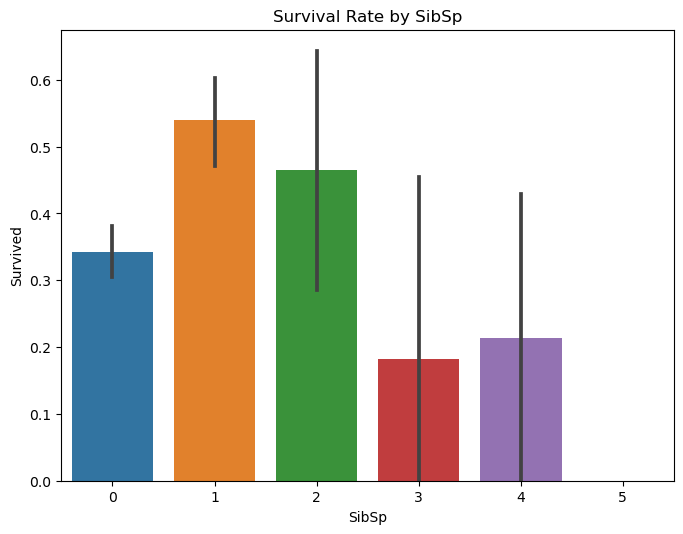

In [73]:
plt.figure(figsize=(20, 15))

# 5. SibSp by Survived
plt.subplot(3, 3, 5)
sns.barplot(x='SibSp', y='Survived', data=train_df)
plt.title('Survival Rate by SibSp')

plt.tight_layout()
plt.show()

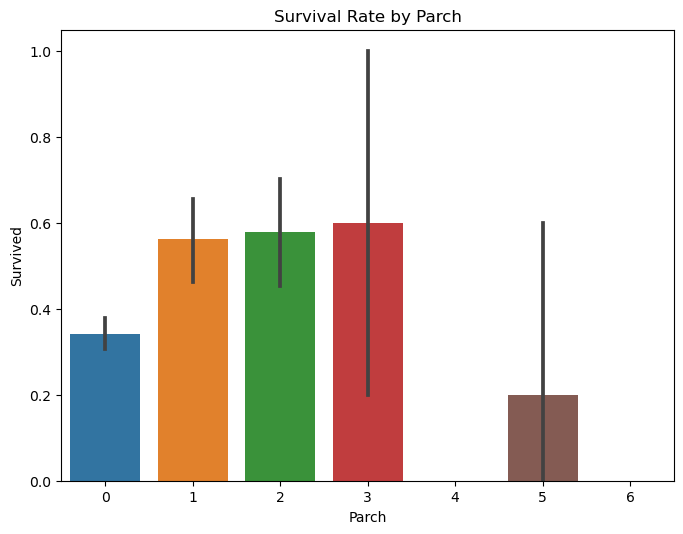

In [74]:
plt.figure(figsize=(20, 15))


# 6. Parch by Survived
plt.subplot(3, 3, 6)
sns.barplot(x='Parch', y='Survived', data=train_df)
plt.title('Survival Rate by Parch')

plt.tight_layout()
plt.show()

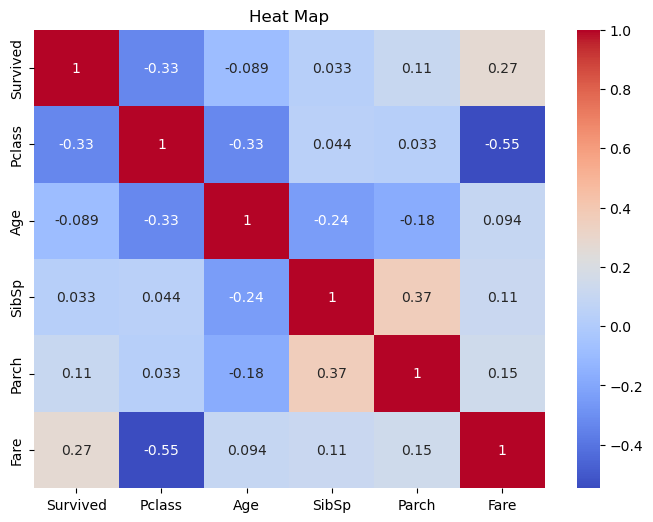

In [75]:
plt.figure(figsize=(20, 15))

# 7. Heatmap
plt.subplot(3, 3, 7)
corr_matrix = train_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heat Map')

plt.tight_layout()
plt.show()

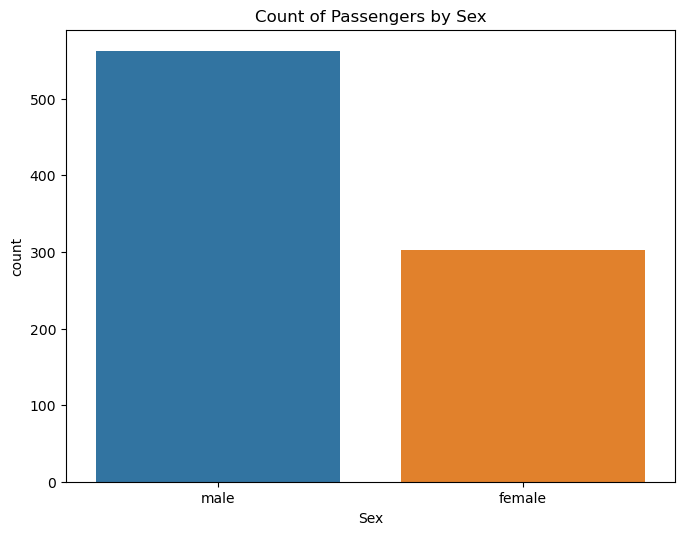

In [76]:
plt.figure(figsize=(20, 15))

# 8. Sex
plt.subplot(3, 3, 8)
sns.countplot(x='Sex', data=train_df)
plt.title('Count of Passengers by Sex')

plt.tight_layout()
plt.show()

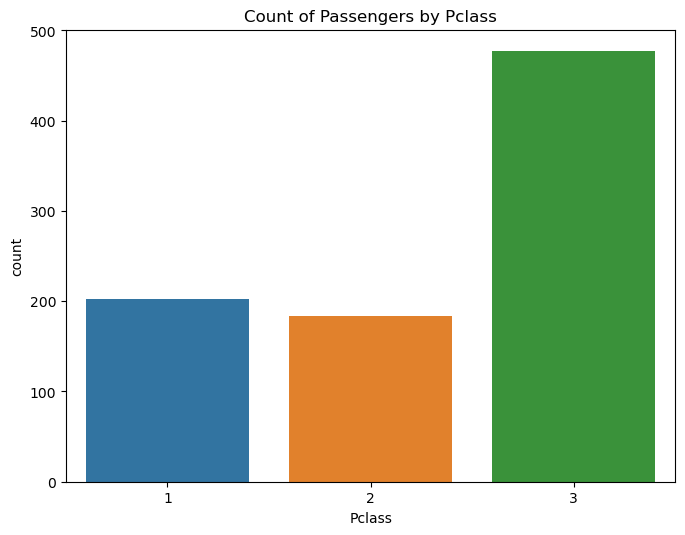

In [77]:
plt.figure(figsize=(20, 15))

# 9. Pclass
plt.subplot(3, 3, 9)
sns.countplot(x='Pclass', data=train_df)
plt.title('Count of Passengers by Pclass')

plt.tight_layout()
plt.show()

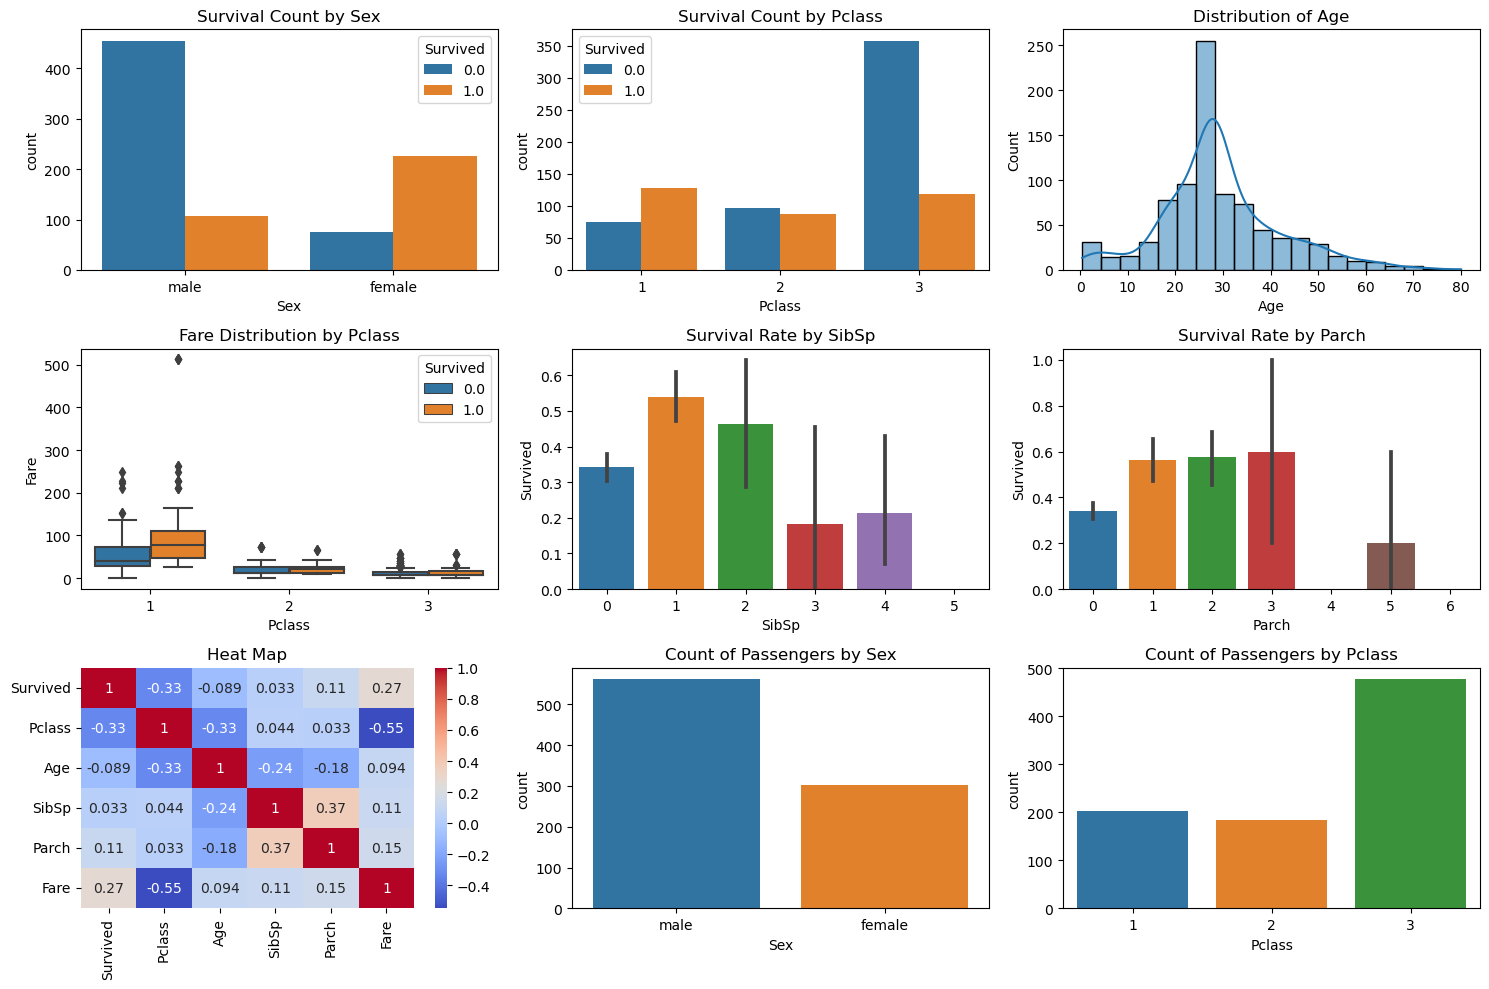

In [78]:
# All graphs in single frame

plt.figure(figsize=(15, 10))

# 1. Sex by Survived
plt.subplot(3, 3, 1)
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival Count by Sex')

# 2. Pclass by Survived
plt.subplot(3, 3, 2)
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival Count by Pclass')

# 3. Age Distribution
plt.subplot(3, 3, 3)
sns.histplot(train_df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')

# 4. Pclass by Fare
plt.subplot(3, 3, 4)
sns.boxplot(x='Pclass', y='Fare', data=train_df, hue='Survived')
plt.title('Fare Distribution by Pclass')

# 5. SibSp by Survived
plt.subplot(3, 3, 5)
sns.barplot(x='SibSp', y='Survived', data=train_df)
plt.title('Survival Rate by SibSp')

# 6. Parch by Survived
plt.subplot(3, 3, 6)
sns.barplot(x='Parch', y='Survived', data=train_df)
plt.title('Survival Rate by Parch')

# 7. Heatmap
plt.subplot(3, 3, 7)
corr_matrix = train_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heat Map')

# 8. Sex
plt.subplot(3, 3, 8)
sns.countplot(x='Sex', data=train_df)
plt.title('Count of Passengers by Sex')

# 9. Pclass
plt.subplot(3, 3, 9)
sns.countplot(x='Pclass', data=train_df)
plt.title('Count of Passengers by Pclass')

plt.tight_layout()
plt.show()


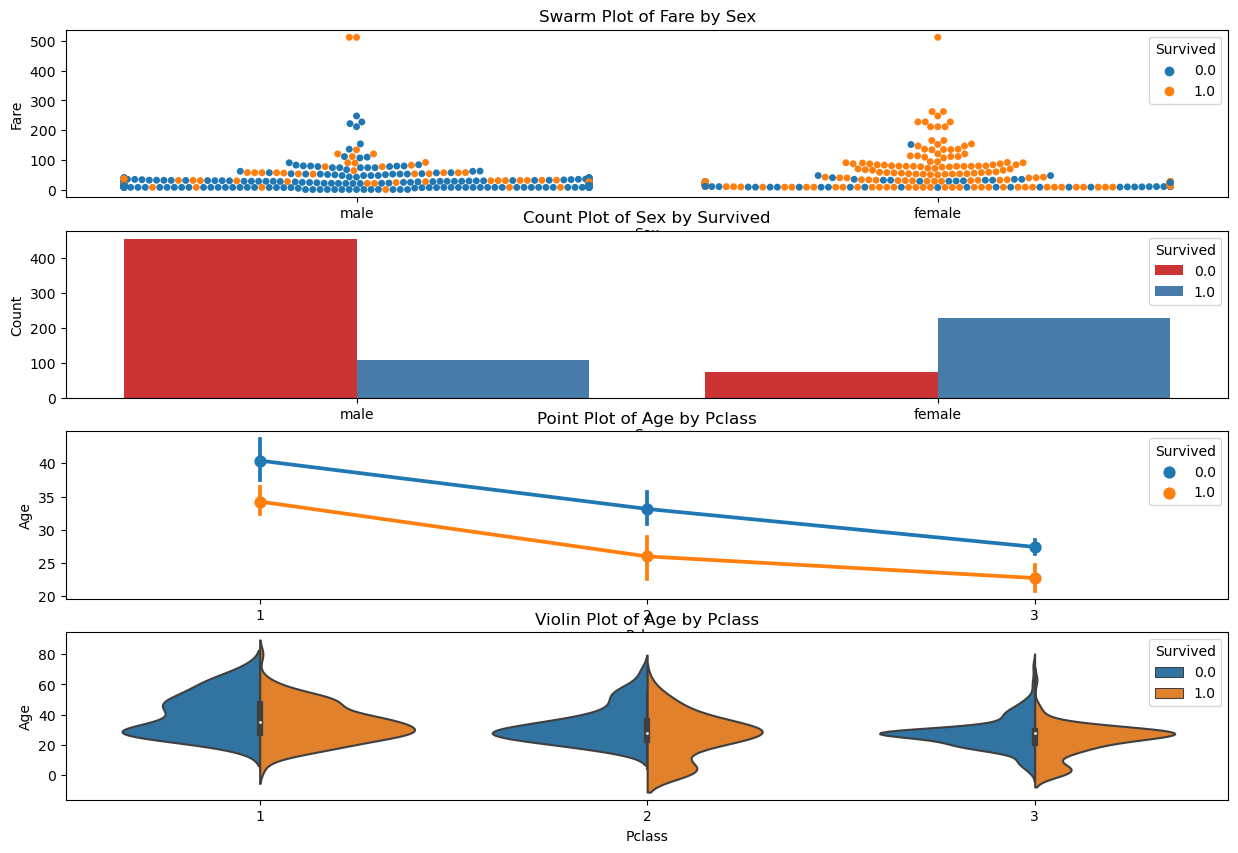

In [79]:
plt.figure(figsize=(15, 10))


# 1. Sex by Fare
plt.subplot(4, 1, 1)
sns.swarmplot(x='Sex', y='Fare', data=train_df, hue='Survived')
plt.title('Swarm Plot of Fare by Sex')

# 2. Sex by Survived

plt.subplot(4, 1, 2)
sns.countplot(x='Sex', hue='Survived', data=train_df, palette='Set1')

plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count Plot of Sex by Survived')


# 3. Pclass by Age
plt.subplot(4, 1, 3)
sns.pointplot(x='Pclass', y='Age', data=train_df, hue='Survived')
plt.title('Point Plot of Age by Pclass')

# 4. Pclass by Age
plt.subplot(4, 1, 4)
sns.violinplot(x='Pclass', y='Age', data=train_df, hue='Survived', split=True)
plt.title('Violin Plot of Age by Pclass')


plt.show()

##### Step 6: Preprocessing the data 

In [80]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [81]:
# Drop the columns that are not needed for modeling
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

for col in categorical_columns:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    label_encoders[col] = le

# Define features and target variable
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##### Step 7: Train and Evaluate the Model 

In [82]:
# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=177)
logreg.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_logreg = logreg.predict(X_train)

# Calculate accuracy for training set predictions
accuracy_logreg_train = accuracy_score(y_train, y_train_pred_logreg)

# Make predictions on the validation set
y_pred_logreg = logreg.predict(X_test)

# Calculate accuracy for validation set predictions
accuracy_logreg_val = accuracy_score(y_test, y_pred_logreg)

# Print training and validation accuracy
print(f'Logistic Regression Accuracy (train): {accuracy_logreg_train:.4f}')
print(f'Logistic Regression Accuracy (validation): {accuracy_logreg_val:.4f}')


Logistic Regression Accuracy (train): 0.8032
Logistic Regression Accuracy (validation): 0.7861


In [83]:
# Initialize and train the Support Vector Machine model
svm = SVC(max_iter=197)

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Support Vector Machine Accuracy: {accuracy_svm:.4f}')

Support Vector Machine Accuracy: 0.8208


In [84]:
# Initialize and train the Decision Tree Classifier model
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)

y_pred_decision_tree = decision_tree.predict(X_test)

accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print(f'Decision Tree Accuracy: {accuracy_decision_tree:.4f}')

Decision Tree Accuracy: 0.7977


In [85]:
# Initialize and train the Random Forest Classifier model

random_forest = RandomForestClassifier(n_estimators=100, max_depth=16, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions
y_train_pred = random_forest.predict(X_train)

# Calculate accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)

print(f'Random Forest Accuracy (train): {accuracy_train:.4f}')

Random Forest Accuracy (train): 0.9986


In [86]:
# Initialize and train the K Neighbors Classifier model

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn:.4f}')

K-Nearest Neighbors Accuracy: 0.8150
